## Mean Shift

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


지나치게 세분화 되어 군집화되었음.

In [7]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster label 유형:', np.unique(cluster_labels))
print(cluster_labels)

cluster label 유형: [0 1 2]
[2 1 1 2 1 2 0 0 1 2 1 2 1 1 1 2 0 0 1 2 2 0 1 1 2 1 0 2 2 2 1 1 2 1 0 0 1
 0 0 2 0 2 2 2 1 1 1 2 1 1 1 0 2 2 2 2 0 0 1 1 2 2 1 0 0 2 0 0 2 0 0 1 1 2
 1 2 0 0 0 2 2 1 1 0 0 1 1 2 1 0 2 2 0 1 0 1 1 2 2 0 0 1 2 1 2 1 0 1 1 0 1
 2 0 2 1 1 1 0 2 2 0 0 2 1 0 1 2 0 2 1 2 0 0 0 1 0 0 1 0 2 2 2 1 0 0 1 2 2
 0 1 0 2 2 2 1 0 0 0 1 1 2 2 2 2 1 1 0 2 0 0 1 0 1 0 2 2 1 2 1 0 1 2 0 0 0
 1 2 0 1 1 2 2 0 0 0 0 2 0 1 0]


estimate_bandwidth() 함수

In [8]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth값: ', round(bandwidth,3))

bandwidth값:  1.816


In [11]:
# 최적 bandwidth로 meanshift 수행
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))
print(clusterDF.head())

cluster labels 유형: [0 1 2]
       ftr1      ftr2  target
0 -1.671737  3.534007       2
1  0.732732  4.413232       0
2  1.084733  4.568501       0
3 -1.458497  3.325950       2
4  1.185037  5.232257       0


시각화

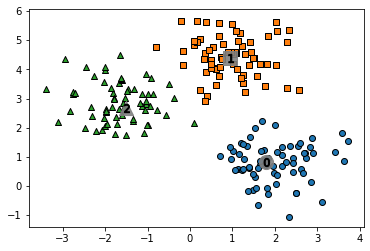

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    # 군집별 산점도 (마커 다르게)
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    #군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$'%label)
    
plt.show()

In [14]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       1                  67
1       0                  67
2       2                  66
Name: meanshift_label, dtype: int64
